<a href="https://colab.research.google.com/github/LucasMirandaVS/ml_studies/blob/main/Previsao_quantitativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré Requisitos

In [33]:
pip install pandas

In [34]:
pip install seaborn

In [35]:
pip install numpy

# Importando os dados



In [36]:
import pandas as pd
import seaborn as sns
import numpy as np

In [37]:
publi = pd.read_csv('/content/advertising.csv')
publi.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Cada observação representa uma campanha publicitária. A resposta (target) é o valor das vendas das campanhas. É a partir deste valor que a previsão será feita.

In [38]:
print(publi.shape)

(200, 4)


In [39]:
x = publi[['TV','Radio','Newspaper']]
y = publi['Sales']

In [40]:
y.shape

(200,)

### Visualizando os dados

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


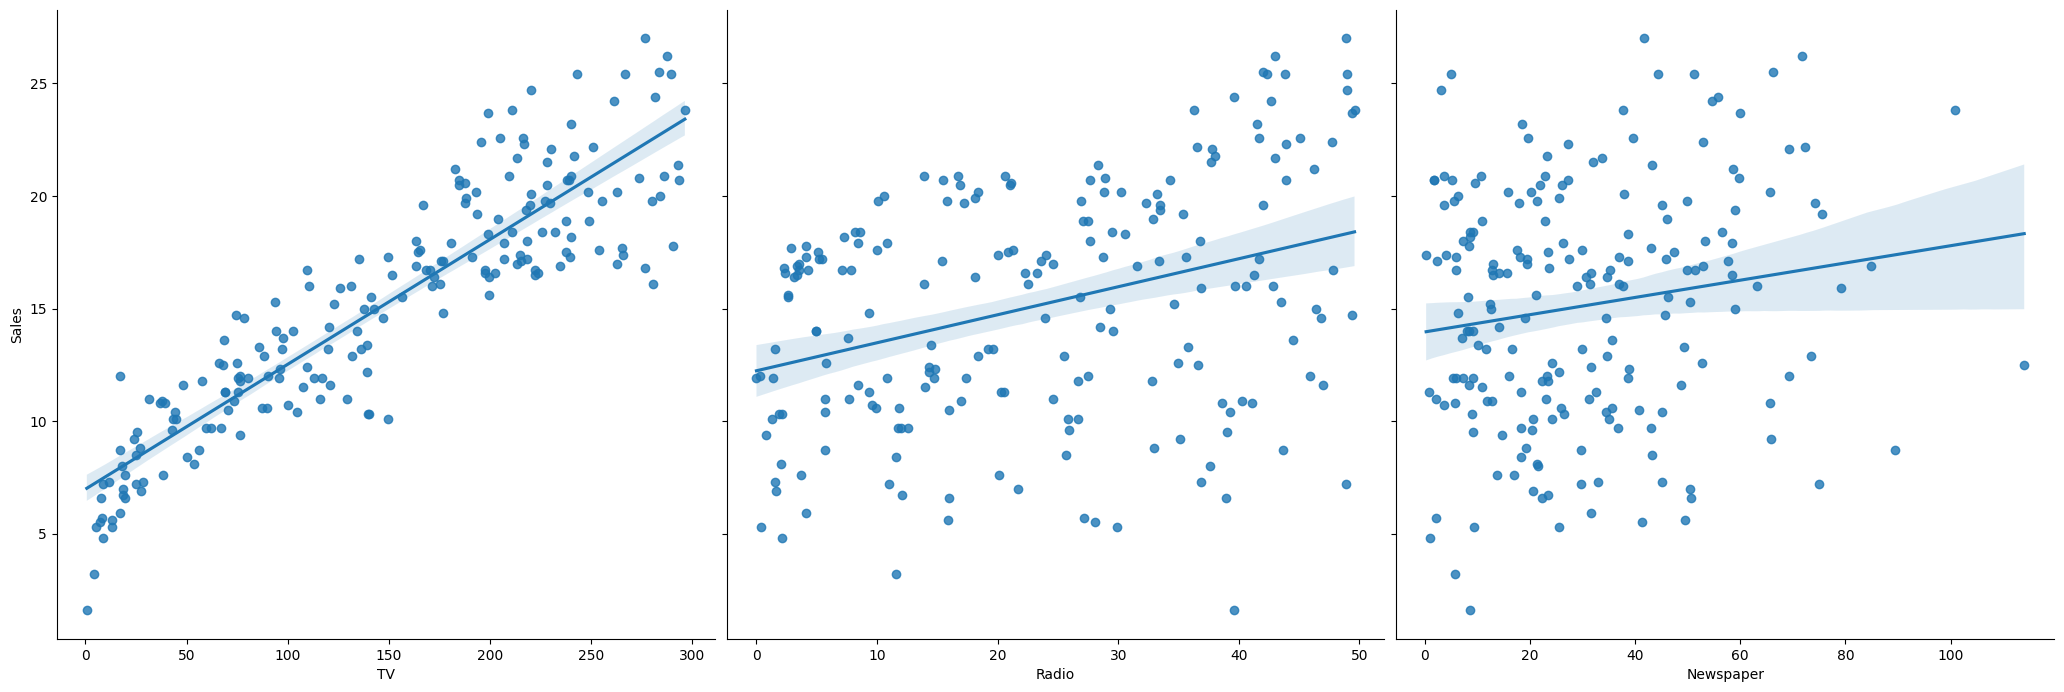

In [41]:
sns.pairplot(publi, x_vars=['TV','Radio','Newspaper'], y_vars='Sales',size=7,kind='reg')

# Aplicando modelo de regressão

In [23]:
# pre requisitos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [17]:
reglin = LinearRegression()
reglin.fit(x_train, y_train)

LinearRegression()

In [21]:
list(zip(['TV','Radio','Newspaper'], reglin.coef_))

[('TV', 0.05399742321359908),
 ('Radio', 0.09155152815493163),
 ('Newspaper', 0.00784299967212701)]

>Com base nesses coeficientes podemos afirmar que a cada 1 dolar investido com camapanhas na TV, temos a venda de 0.05 unidades. Para o caso das campanhas em Radio temos um aumento de 0.09 em vendas, e para cada 1 dolar investido em campanhas em jornal temos aumento de 0,07 nas vendas.






### Previsão

In [22]:
y_prev = reglin.predict(x_test)
print(y_prev)

[16.8706619  15.51059314 12.71574554 17.63811211 20.45701303 11.89023343
 11.87352124 17.51697996 14.5672724  21.67021087 10.66485551 20.00865229
 16.75467807 15.43191038 22.18033322 16.51858934 13.79107663 15.89146133
 16.11340674 13.0995791  10.76459477 23.46927118 20.53702398 17.64258912
 16.84940227 13.63837817 21.44353401 14.71922544 15.91669081 18.42504165
 18.19391164 22.68934317  7.41097344 23.98165487 20.01302918 10.07746382
  6.27565582 20.94299378 15.76029496 19.39699661 10.48065499 15.22121343
  9.69590296  6.05179234  8.62988017  8.69404111 13.48282743 13.12211596
 18.96711789  7.28114815 18.87466713 10.34466162 21.1304549  24.84321546
 17.35583545  7.31363956 12.47829625 10.71571711 23.18478427 18.74026882]


### Avaliação da Performance

1.   MAE (mean absolute error)



In [27]:
print(metrics.mean_absolute_error(y_test,y_prev))

1.3511145801068147




2. MSE (mean squared error)



In [26]:
print(metrics.mean_squared_error(y_test,y_prev))

3.158043970748966




3.   RMSE (root mean squared error)


In [42]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_prev)))

1.7770886220864073


In [43]:
# Avaliando a performance de forma massiva

In [44]:
testes = [['TV','Radio','Newspaper'],['Radio', 'Newspaper'], ['TV','Newspaper'],['TV','Radio']]
vencedor = {'teste': '', 'performance': None}
primeira_passagem = True

In [46]:
for teste in testes:
    x = publi[teste]
    y = publi['Sales']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=5)
    reglin = LinearRegression()
    reglin.fit(x_train,y_train)
    y_prev = reglin.predict(x_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_prev))
    print('Teste: ')
    print(teste)
    print('Performance: ')
    print(rmse)
    print('-----------------')
    if (primeira_passagem):
        vencedor['teste'] = teste
        vencedor['performance'] = rmse
        primeira_passagem = False
    else:
        if (rmse < vencedor['performance']):
            vencedor['teste'] = teste
            vencedor['performance'] = rmse

print('-----------------')
print('Vencedor: ')
print(vencedor['teste'])
print('Performance do vencedor: ')
print(vencedor['performance'])

Teste: 
['TV', 'Radio', 'Newspaper']
Performance: 
1.3570956388868882
-----------------
Teste: 
['Radio', 'Newspaper']
Performance: 
4.883915543206654
-----------------
Teste: 
['TV', 'Newspaper']
Performance: 
1.9214277085717903
-----------------
Teste: 
['TV', 'Radio']
Performance: 
1.3549049897062917
-----------------
-----------------
Vencedor: 
['TV', 'Radio']
Performance do vencedor: 
1.3549049897062917


De acordo com o método de análise, o vencedor é o modelo que leva em consideração apenas TV e Rádio como variáveis explicativas.